# Gaussian sampled hot-encoding, for `1`, and `0` separately

 ### Dataframes, { input : `df(e)`, output : `dh(p:1,q:0)` }

In [170]:
df.columns

Index(['d', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [171]:
dh.columns

Index(['p', 'q', 'd', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

**{ `p:1`,`q:0` }** : are the hot encoded vectors where $(p,q)$ are in the `dh` data-frame replacing $(e)$ in `df` with the gaussian distribution. So classification could be done via two nodes

### algorithm

* generate samples from Gaussian distribution, preferably positive values 
* normalize the samples, done by taking the ratio w.r.t `max`
* operations are carried out for 1, 0 separately and results combine in the end

## variable names for data-frames

* `df{1,0}` : whenever event is 1, 0 
* `g{1,0}` : gaussian samples filtered for 1, 0 separately, i.e. exluding a region around mean
* `g00, g11` : samples from g0, and g1 

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [105]:
import utils as ut

In [132]:
df = ut.data1()

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)


In [133]:
df1 = df[ df['e'] == 1 ]
df0 = df[ df['e'] == 0 ]

In [134]:
df = ut.data1()

mu, sigma = 8, 2
s = np.random.normal(mu, sigma, 100000)

dg = pd.DataFrame({'e':s})
g0 = dg[ dg.e < 3.8 ]
g1 = dg[ dg.e > 5.2 ]

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)


In [54]:
g0.describe()

e
count  1681.000000
mean      3.065566
std       0.676248
min      -0.665764
25%       2.735945
50%       3.258295
75%       3.582534
max       3.798594

In [135]:
g1.describe()

e
count  92037.000000
mean       8.330866
std        1.720465
min        5.200287
25%        7.023971
50%        8.209018
75%        9.484073
max       16.890796

**`before normalization`**

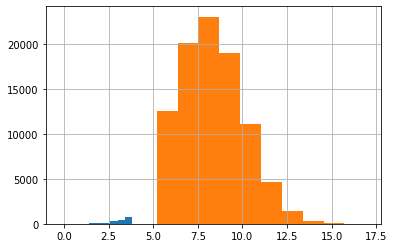

In [136]:
_ = plt.hist(g0)
_ = plt.hist(g1)
plt.grid()

**`normalization`**

In [137]:
g0 = g0/g0.max()
g1 = g1/g1.max()

In [138]:
g0.shape, g1.shape

((1708, 1), (92037, 1))

**`after normalization`**

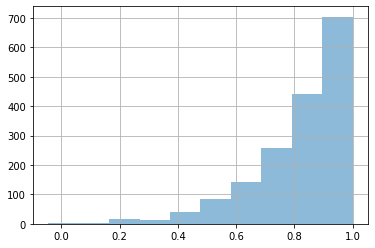

In [139]:
_ = plt.hist(g0, alpha=0.5)
plt.grid()

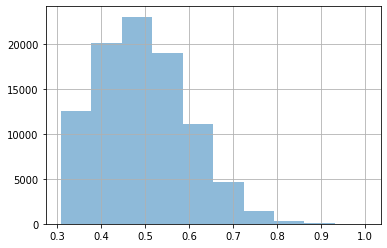

In [140]:
_ = plt.hist(g1, alpha=0.5)
plt.grid()

**`left/right on same plot`**

not to be surprised, because the data is normalized and the histograms plotted, after normalization any point will be within $[0,1]$

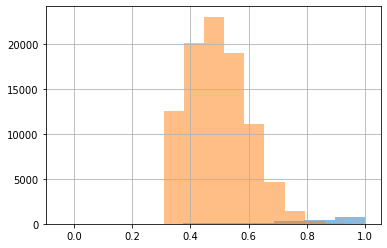

In [141]:
_ = plt.hist(g0, alpha=0.5)
_ = plt.hist(g1, alpha=0.5)

plt.grid()

**`list plot`**

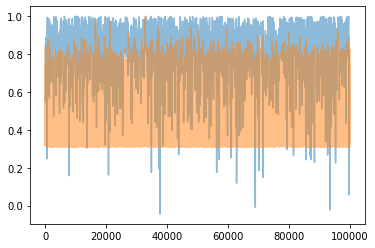

In [142]:
plt.plot(g0, alpha=0.5)
plt.plot(g1, alpha=0.5)

<br>

collecting samples from samples

* `g00` : samples matching size of df0
* `g11` : samples matching size of df1

In [143]:
g00 = g0.sample(n=df0.shape[0], random_state=1)
g11 = g1.sample(n=df1.shape[0], random_state=5)

In [144]:
g00.shape, g11.shape

((228, 1), (54, 1))

In [146]:
df1.shape, g11.shape

((54, 11), (54, 1))

In [147]:
df0.shape, g00.shape

((228, 11), (228, 1))

In [128]:
df1 = df1.reset_index()
g11 = g11.reset_index()

In [148]:
df1.columns

Index(['d', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

<br>

index reset is required for pandas to understand the internal structure properly when inserting new data

In [149]:
df0 = df0.reset_index()
g00 = g00.reset_index()

In [150]:
df0.columns

Index(['index', 'd', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [151]:
del df0['e']

In [152]:
df0.insert(1, 'e', g00['e'].to_numpy())

In [153]:
df0

index         e           d         1         2         3         4  \
0        0  0.924708  2015-01-01  0.029993  0.040501  0.009325  0.010223   
1        1  0.704629  2015-01-02  0.029993  0.040502  0.009357  0.010430   
2        2  0.928508  2015-01-03  0.030042  0.040511  0.009390  0.010383   
3        3  0.242713  2015-01-04  0.030276  0.040557  0.009416  0.010320   
4        5  0.934927  2015-01-06  0.006667  0.012948  0.008584  0.009372   
..     ...       ...         ...       ...       ...       ...       ...   
223    299  0.970769  2015-10-27  0.001966  0.000022  0.000372  0.000286   
224    300  0.720277  2015-10-29  0.001966  0.000022  0.000372  0.000244   
225    301  0.995538  2015-10-30  0.001966  0.000022  0.000373  0.000212   
226    302  0.822710  2015-10-31  0.001966  0.000022  0.000373  0.000275   
227    303  0.940998  2015-11-02  0.001966  0.000022  0.000375  0.000294   

            5         6         7         8         9  
0    0.008673  0.021652  0.021897  0.022025  0.021652  
1    0.008673  0.022579  0.022301  0.025530  0.022579  
2    0.008673  0.022579  0.024078  0.025530  0.022579  
3    0.008667  0.024894  0.031812  0.028191  0.024894  
4    0.008255  0.010305  0.024150  0.025354  0.010305  
..        ...       ...       ...       ...       ...  
223  0.000216  0.003010  0.000158  0.003761  0.003010  
224  0.000216  0.003010  0.000158  0.003761  0.003010  
225  0.000216  0.003937  0.000220  0.003761  0.003937  
226  0.000216  0.003937  0.000220  0.003762  0.003937  
227  0.000216  0.004168  0.000225  0.003762  0.004168  

[228 rows x 12 columns]

In [154]:
del df1['e']

In [155]:
df1.insert(1, 'e', g11['e'].to_numpy())

In [157]:
df1.head()

d         e         1         2         3         4         5  \
4   2015-01-05  0.350991  0.008236  0.033398  0.009443  0.010084  0.008665   
6   2015-01-07  0.410119  0.005453  0.007201  0.006652  0.007291  0.006734   
8   2015-01-09  0.509487  0.005388  0.007159  0.006161  0.006399  0.006510   
12  2015-01-13  0.502905  0.005388  0.007159  0.006271  0.006788  0.006523   
13  2015-01-14  0.598232  0.005184  0.007125  0.005984  0.006373  0.006284   

           6         7         8         9  
4   0.025357  0.030734  0.028793  0.025357  
6   0.006426  0.006553  0.019230  0.006426  
8   0.004863  0.005956  0.015900  0.004863  
12  0.006021  0.004224  0.012585  0.006021  
13  0.004863  0.004965  0.008639  0.004863

In [158]:
n1 = np.ones(df1.shape[0])
n0 = np.zeros(df0.shape[0])

In [159]:
df1.columns

Index(['d', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [160]:
df0.columns

Index(['index', 'e', 'd', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [161]:
df1 = df1.rename(columns={'e':'p'})
nn = np.zeros(df1.shape[0])
df1.insert(1, 'q', nn)

In [162]:
df1.head()

d    q         p         1         2         3         4  \
4   2015-01-05  0.0  0.350991  0.008236  0.033398  0.009443  0.010084   
6   2015-01-07  0.0  0.410119  0.005453  0.007201  0.006652  0.007291   
8   2015-01-09  0.0  0.509487  0.005388  0.007159  0.006161  0.006399   
12  2015-01-13  0.0  0.502905  0.005388  0.007159  0.006271  0.006788   
13  2015-01-14  0.0  0.598232  0.005184  0.007125  0.005984  0.006373   

           5         6         7         8         9  
4   0.008665  0.025357  0.030734  0.028793  0.025357  
6   0.006734  0.006426  0.006553  0.019230  0.006426  
8   0.006510  0.004863  0.005956  0.015900  0.004863  
12  0.006523  0.006021  0.004224  0.012585  0.006021  
13  0.006284  0.004863  0.004965  0.008639  0.004863

In [163]:
df0 = df0.rename(columns={'e':'q'})
nn = np.zeros(df0.shape[0])
df0.insert(1, 'p', nn)

In [164]:
df0.head()

index    p         q           d         1         2         3         4  \
0      0  0.0  0.924708  2015-01-01  0.029993  0.040501  0.009325  0.010223   
1      1  0.0  0.704629  2015-01-02  0.029993  0.040502  0.009357  0.010430   
2      2  0.0  0.928508  2015-01-03  0.030042  0.040511  0.009390  0.010383   
3      3  0.0  0.242713  2015-01-04  0.030276  0.040557  0.009416  0.010320   
4      5  0.0  0.934927  2015-01-06  0.006667  0.012948  0.008584  0.009372   

          5         6         7         8         9  
0  0.008673  0.021652  0.021897  0.022025  0.021652  
1  0.008673  0.022579  0.022301  0.025530  0.022579  
2  0.008673  0.022579  0.024078  0.025530  0.022579  
3  0.008667  0.024894  0.031812  0.028191  0.024894  
4  0.008255  0.010305  0.024150  0.025354  0.010305

<br>

combine the data frames vertically, like union in databases

In [165]:
dh = pd.concat([df0,df1])

In [166]:
dh.reset_index()

level_0  index         p         q           d         1         2  \
0          0    0.0  0.000000  0.924708  2015-01-01  0.029993  0.040501   
1          1    1.0  0.000000  0.704629  2015-01-02  0.029993  0.040502   
2          2    2.0  0.000000  0.928508  2015-01-03  0.030042  0.040511   
3          3    3.0  0.000000  0.242713  2015-01-04  0.030276  0.040557   
4          4    5.0  0.000000  0.934927  2015-01-06  0.006667  0.012948   
..       ...    ...       ...       ...         ...       ...       ...   
277      215    NaN  0.318627  0.000000  2015-08-04  0.004155  0.002572   
278      229    NaN  0.512110  0.000000  2015-08-18  0.001681  0.000436   
279      277    NaN  0.586975  0.000000  2015-10-05  0.000107  0.000103   
280      281    NaN  0.407367  0.000000  2015-10-09  0.000107  0.000093   
281      298    NaN  0.408359  0.000000  2015-10-26  0.001966  0.000021   

            3         4         5         6         7         8         9  
0    0.009325  0.010223  0.008673  0.021652  0.021897  0.022025  0.021652  
1    0.009357  0.010430  0.008673  0.022579  0.022301  0.025530  0.022579  
2    0.009390  0.010383  0.008673  0.022579  0.024078  0.025530  0.022579  
3    0.009416  0.010320  0.008667  0.024894  0.031812  0.028191  0.024894  
4    0.008584  0.009372  0.008255  0.010305  0.024150  0.025354  0.010305  
..        ...       ...       ...       ...       ...       ...       ...  
277  0.003057  0.002852  0.003271  0.000926  0.003887  0.000671  0.000926  
278  0.002383  0.002138  0.001633  0.001158  0.001032  0.000404  0.001158  
279  0.001617  0.001249  0.000879  0.001389  0.000725  0.001859  0.001389  
280  0.001560  0.001238  0.000810  0.006484  0.001124  0.006439  0.006484  
281  0.000384  0.000266  0.000203  0.003647  0.000194  0.003761  0.003647  

[282 rows x 14 columns]

In [168]:
del dh['index']

In [169]:
dh.columns

Index(['p', 'q', 'd', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

additional check to see if there any nulls introduced along the way

In [179]:
for e in dh.columns :
    print(e, ': ', dh[e].isnull().values.any())

p :  False
q :  False
d :  False
1 :  False
2 :  False
3 :  False
4 :  False
5 :  False
6 :  False
7 :  False
8 :  False
9 :  False


In [182]:
dh.shape, df.shape

((282, 12), (282, 11))

In [185]:
df.d

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
299    2015-10-27
300    2015-10-29
301    2015-10-30
302    2015-10-31
303    2015-11-02
Name: d, Length: 282, dtype: object

In [186]:
dh.d

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-06
          ...    
215    2015-08-04
229    2015-08-18
277    2015-10-05
281    2015-10-09
298    2015-10-26
Name: d, Length: 282, dtype: object

Looks good, sanity checks, if a specific column retains the same data before and after operation at a specific date

In [191]:
m = dh[ dh.d == '2015-10-26' ][ut.allcols()].to_numpy()
n = df[ df.d == '2015-10-26' ][ut.allcols()].to_numpy()

In [192]:
m == n

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True]])